# Exercice 1 : illustration

Afin de comprendre le comportement de la suite en fonction de la valeur de $a$, voici une petite animation pour $u_0=0.77$ avec le paramètre $a$ qui part de $0$ pour augmenter jusque $4$.

On voit que pour 
- $a\in[0,1]$, une seule limite possible car $f(\ell)=\ell$ a une seule solution : $\ell=0$. La suite converge vers $0$.
- $a\in]1,3[$, il y a deux limites possibles car $f(\ell)=\ell$ a deux solutions : $\ell=0$ ou $\ell=1-1/a$. Comme $f'(0)=a>1$ et $f'(1-1/a)=2-a\in]-1,1[$, la suite converge vers $\ell=1-1/a$.
- pour $a\geq3$, les points fixes de $f$ ne sont plus attracteurs : des cycles commencent à apparaitre. Des $2$-cycles avec les sous-suites des termes paires et impaires qui convergent vers les points fixes de $f\circ f$ différents de $0$ et $1-1/a$. Puis cela se complique...

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
mpl.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'svg'
%matplotlib notebook

UPS_primary = (0.38823529411764707, 0.0, 0.23529411764705882)
UPS_gris = (49/255, 62/255, 72/255)
UPS_bleu = (0.0, 0.3058823529411765, 0.49019607843137253)
UPS_orange = (0.9333333333333333, 0.20392156862745098, 0.13725490196078433)
UPS_vert = (0.0, 0.5019607843137255, 0.47843137254901963)

<IPython.core.display.Javascript object>


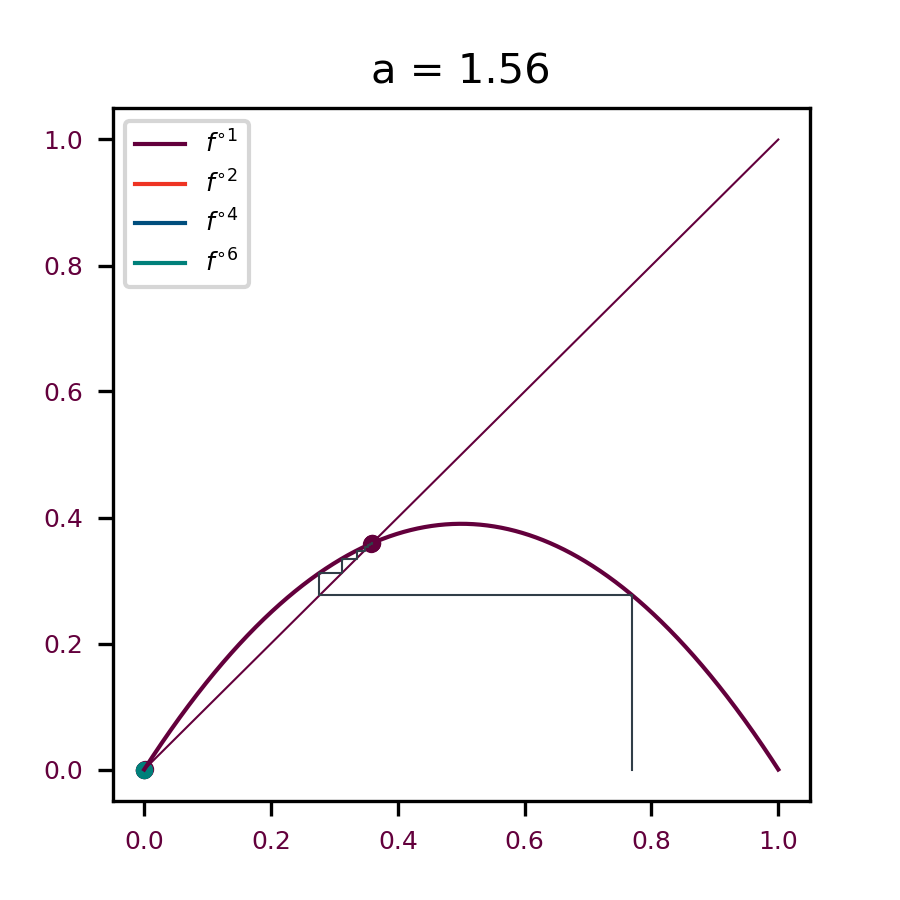

In [3]:
def f(x, a):
    return a*x*(1-x)

def fof(x, a, vectn):
    out = []
    y = x.copy()
    k = 0
    for n in vectn:
        while k < n:
            k += 1
            y[:] = f(y, a)
        out.append(y.copy())
    return out

def zeros(x, y, N):
    ind = abs(y) < 1/N
    return np.array(
        [x[ind], y[ind]+x[ind]]
    ).T

def suite(u0, a, N):
    u = np.zeros((N+1,))
    u[0] = u0
    for k in range(N):
        u[k+1] = f(u[k], a)
    return u

def u_graph(u):
    px = np.repeat(u, 2)
    py = px[1:].copy()
    px = px[:-1]
    py[0] = 0
    nn = 1
    while abs(u[-nn-1]-u[-1]) > .01 and nn < 10:
        nn += 1
    return px, py, nn

N = 1000
u0 = 0.77
nlim = [1, 2, 4, 6]
ncolor = [UPS_primary, UPS_orange, UPS_bleu, UPS_vert]
adata = np.linspace(0, 4, 801)

fig = plt.figure(figsize=(3, 3))
axani = fig.add_subplot(1, 1, 1)
xx = np.linspace(0, 1, N+1)
axani.plot(xx, xx, color=UPS_primary, linewidth=.5)

lst_f = []
lst_pts = []
for k, n in enumerate(nlim):
    lst_f.append(
        axani.plot(
            [], [], alpha=1, linewidth=1,
            color=ncolor[k], label=f'$f^{{\circ {n}}}$'
        )[0]
    )
    lst_pts.append(axani.scatter([], [], color=ncolor[k], s=10))
axani.legend(fontsize=6, loc='upper left')
axani.tick_params(
    labelsize=6, labelcolor=UPS_primary
)
lsuite = axani.plot([], [], linewidth=.5, alpha=1, color=UPS_gris)[0]

def update(frame):
    a = adata[int(frame)]
    px, py, nn = u_graph(suite(u0, a, 50))
    lsuite.set_data(px, py)
    for n, yy in enumerate(fof(xx, a, nlim)):
        lst_f[n].set_data(xx, yy)
        z = zeros(xx, yy-xx, N)
        lst_pts[n].set_offsets(z)
    for n in range(nn, len(nlim), 1):
        lst_f[n].set_data([], [])
        lst_pts[n].set_offsets(np.array([0, 0]).T)
    for l in lst_f:
        l.set_alpha(.25)
    if nn in nlim:
        lst_f[nlim.index(nn)].set_alpha(1)
    axani.set_title(f"a = {a:4.2f}", fontsize=10)
    return lst_f, lst_pts, lsuite

update(0)
ani = FuncAnimation(
    fig, update,
    blit=False, interval=100,
    frames=adata.size
)

# ani.save("06_1_anim1.gif")

:::{image} 06_1_anim1.gif
:alt: ipywidget
:class: bg-primary mb-1
:width: 50%
:align: center
:::